In [1]:
import pandas_datareader as web
import datetime
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import math
import seaborn as sns

In [2]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 12, 31)
amzn = web.DataReader('AMZN', 'yahoo', start, end) 
amzn.head()
amzn.count()

High         1510
Low          1510
Open         1510
Close        1510
Volume       1510
Adj Close    1510
dtype: int64

In [3]:
#amzn['Typical_Price'] = amzn[['High','Low','Close']].mean(axis=1)
amzn['lrets'] = (np.log(amzn.Close) - np.log(amzn.Close.shift(1))) * 100.
amzn.head()

,High,Low,Open,Close,Volume,Adj Close,lrets
Date,,,,,,,
2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001,NaN
2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002,-0.385192
2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005,-0.711332
2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999,1.111598
2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013,0.972572


In [4]:
amzn['Stock_Price'] = (2*amzn.High + amzn.Low + amzn.Close)/4

In [14]:
amzn= amzn.round(2)
amzn.tail(100)

,High,Low,Open,Close,Volume,Adj Close,lrets,Stock_Price
Date,,,,,,,,
2019-08-09,1831.09,1802.22,1828.95,1807.58,2879800,1807.58,-1.39,1818.00
2019-08-12,1800.98,1777.00,1795.99,1784.92,2905500,1784.92,-1.26,1790.97
2019-08-13,1831.74,1780.00,1783.00,1824.34,3994000,1824.34,2.18,1816.96
2019-08-14,1795.65,1757.22,1793.01,1762.96,4893600,1762.96,-3.42,1777.87
2019-08-15,1788.00,1761.96,1781.99,1776.12,3759100,1776.12,0.74,1778.52
2019-08-16,1802.91,1784.55,1792.89,1792.57,3018000,1792.57,0.92,1795.74
2019-08-19,1826.00,1812.61,1818.08,1816.12,2816300,1816.12,1.31,1820.18
2019-08-20,1816.82,1799.88,1814.50,1801.38,1929500,1801.38,-0.81,1808.72
2019-08-21,1829.58,1815.00,1819.39,1823.54,2031800,1823.54,1.22,1824.42


In [26]:
x=amzn.drop(['Close'],axis=1)
y=amzn['Close']
amzn= amzn.fillna(0)

In [27]:
xtrain= X[:1410]
xtest = X[1410:]
ytrain= y[:1410]
ytest=  y[1410:]

Alpha:0.0001, R2:1.00, MSE:41.31, RMSE:6.43
Alpha:0.0010, R2:1.00, MSE:41.30, RMSE:6.43
Alpha:0.0100, R2:1.00, MSE:41.28, RMSE:6.43
Alpha:0.1000, R2:1.00, MSE:41.07, RMSE:6.41
Alpha:0.3000, R2:1.00, MSE:40.66, RMSE:6.38
Alpha:0.5000, R2:1.00, MSE:40.32, RMSE:6.35
Alpha:0.7000, R2:1.00, MSE:40.04, RMSE:6.33
Alpha:1.0000, R2:1.00, MSE:39.72, RMSE:6.30
R2:0.970, MSE:35.91, RMSE:5.99


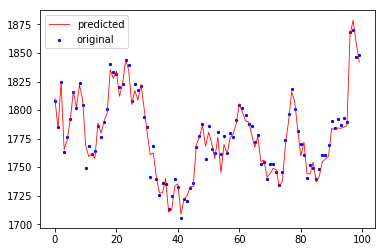

0.0001
5.13258413251117
R2:0.970, MSE:35.91, RMSE:5.99


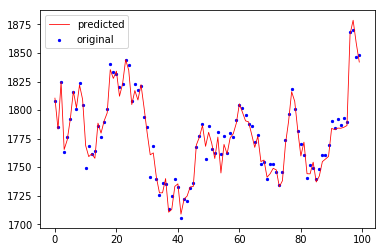

In [28]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

for a in alphas:
    model = ElasticNet(alpha=a).fit(x,y)   
    score = model.score(x, y)
    pred_y = model.predict(x)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

elastic=ElasticNet(alpha=0.01).fit(xtrain, ytrain)
ypred = elastic.predict(xtest)
score = elastic.score(xtest, ytest)
mse = mean_squared_error(ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()


# --- ElasticNetCV ----
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(xtrain, ytrain)
print(model.alpha_)
print(model.intercept_)

ypred = model.predict(xtest)
score = model.score(xtest, ytest)
mse = mean_squared_error(ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()


### Monte Carlo

#### We are using a Monte Carlo simulation to look at the potential evolution of Amazon prices over time, assuming they are subject to daily returns that follow a normal distribution 

#### If we want to buy a Amazon stock,  we may like to try to look into the future and attempt to predict what kind of returns we can expect with what kind of probability

#### just assuming past mean return and volatility levels will continue into the future#### 

In [37]:
from math import sqrt
#calculate the compound annual growth rate (CAGR) which 
#will give us our mean return input (mu) 
days = (amzn.index[-1] - amzn.index[0]).days
cagr = ((((amzn['Adj Close'][-1]) / amzn['Adj Close'][1])) ** (365.0/days)) - 1
print ('CAGR(compound annual growth rate) =',str(round(cagr,4)*100)+"%")
mu = cagr

#create a series of percentage returns and calculate 
#the annual volatility of returns
amzn['Returns'] = amzn['Adj Close'].pct_change()
vol = amzn['Returns'].std()*sqrt(252)
print ("Annual Volatility =",str(round(vol,4)*100)+"%")

CAGR(compound annual growth rate) = 29.26%
Annual Volatility = 29.79%


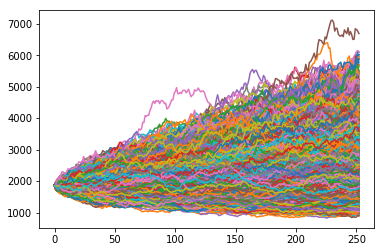

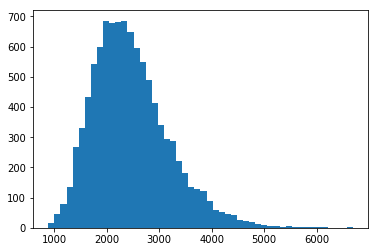

In [41]:
#Define Variables
S = amzn['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.2926 #Return
vol = 0.2979 #Volatility
#set up empty list to hold our ending values for each simulated price series
result = []
#choose number of runs to simulate - I have chosen 10,000
for i in range(10000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)

    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
    
    #append the ending value of each simulated run to the empty list we created at the beginning
    result.append(price_list[-1])

#show the plot of multiple price series created above
plt.show()

#create histogram of ending stock values for our mutliple simulations
plt.hist(result,bins=50)
plt.show()


In [42]:
#use numpy mean function to calculate the mean of the result
print(round(np.mean(result),2))

2461.42


In [43]:
print("5% quantile =",np.percentile(result,5))
print("95% quantile =",np.percentile(result,95))

5% quantile = 1449.2303173693012
95% quantile = 3817.6263879493645


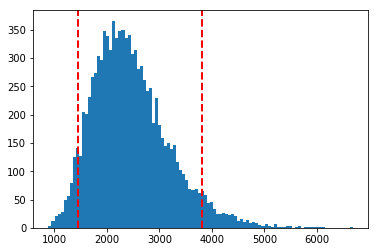

In [46]:
plt.hist(result,bins=100)
plt.axvline(np.percentile(result,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(result,95), color='r', linestyle='dashed', linewidth=2)
plt.show()

## Risk analysis 
##### Am I willing to risk a 5% chance of ending up with a stock worth less than 1449 dollars in order to chase an expected return of around 29% giving us an expected stock price of around 2461 dollars?”
#### Currently Amazon's stock price is around 2000 dollars